# **K Nearest Neighbour Algorithm**

**Type** - Supervise Learning Algorithm  
**Task** - Classification and Regression  

Remember that, KNN is a:
1. **Non-Parametric Algorithm**, meaning it doesn't make assumptions about the underlying data distribution.
2. **Lazy Learning Algorithm**, meaning it doesn't learn a model during the training phase. Instead, it makes predictions based on the majority class or average value of its k-nearest neighbors.

### **Algorithm Workflow**
1. **Training Phase** -
    - KNN doesn't have a training phase as it memorizes the entire training dataset.
    - Choose **k** (i.e. Number of Nearest Neighbours).
    - Choose a **distance metric**.
    - ```python
      # Code implementation
      from sklearn.neighbors import KNeighborsClassifier
      classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',  p=2)
      ```
2. **Prediction Phase** -
    - **Similarity Calculation** - For each new query data point, the algorithm calculates the distance to all other points in the training set.
    - Select the **k** nearest neighbors based on the calculated distances.
    - **Majority Vote (Classification) or Average (Regression)** - In classification, the algorithm assigns the class label that is most common among its k neighbors. In regression, it predicts the average target value of its k neighbors.
    - ```python
      # Code Implementation
      classifier.predict(X_test_transformed)
      ```


### **Use Cases** -
KNN is used in various applications, including handwriting recognition, image classification, recommendation systems, and medical diagnosis.

### **Important Note** -
The performance of the k-Nearest Neighbors (KNN) algorithm can be affected by the presence of outliers and missing data. Let's discuss how outliers and missing data can impact KNN.
1. Outliers can significantly impact distance calculations, especially if the distance metric is sensitive to extreme values. For example, the Euclidean distance is sensitive to outliers.
2. Missing data can affect the calculation of distances between data points. If features have missing values, it can lead to biased distance computations.  
**Mitigating this Issue** - The performance of KNN can be sensitive to outliers and missing data, but with proper data preprocessing, appropriate handling of missing values, and careful selection of distance metrics, it is possible to improve the robustness of the algorithm in the presence of such challenges.

## **Loading the Data**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH = "/content/drive/MyDrive/Colab Notebooks/Algorithms/1. K Nearest Neighbors/data/fashion-mnist-data.csv"

df = pd.read_csv(PATH)

df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(60000, 785)

<Axes: xlabel='label', ylabel='count'>

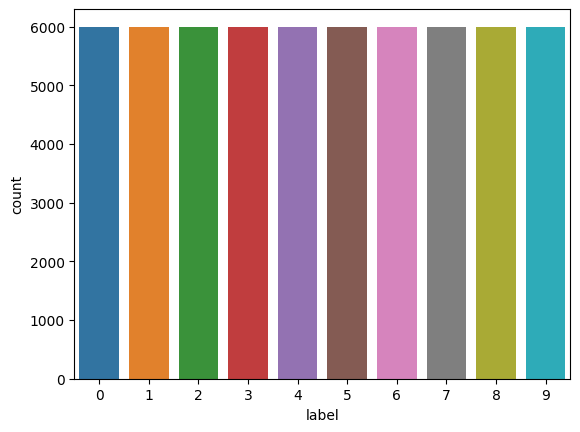

In [5]:
sns.countplot(data=df, x='label')

## **About the dataset**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

| Label | Fashion Product |
| :---: | :---: |
| 0 | T-shirt/top |
| 1 | Trouser |  
| 2 | Pullover |  
| 3 | Dress |  
| 4 | Coat |  
| 5 | Sandal |  
| 6 | Shirt |  
| 7 | Sneaker |  
| 8 | Bag |  
| 9 | Ankle boot |  

## **Identify Input and Output**

In [6]:
y = df['label']

X = df.drop("label", axis=1)

In [7]:
print(X.shape)

print(y.shape)

(60000, 784)
(60000,)


0


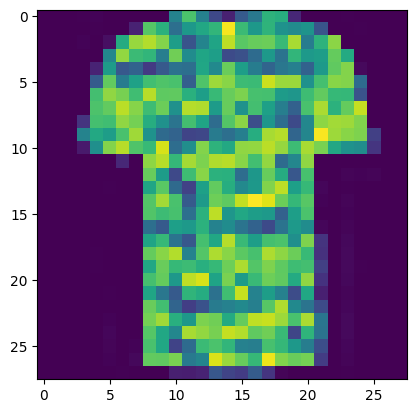

In [8]:
idx = 3

print(y[idx])

img = np.reshape(X.values[idx], (28,28))

plt.imshow(img)

3


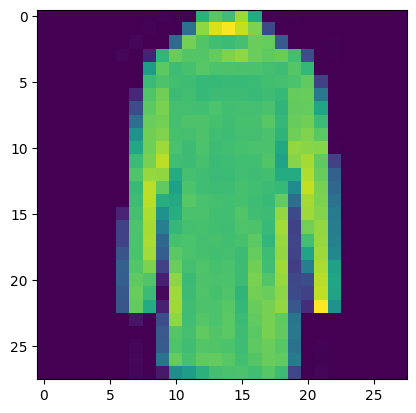

In [9]:
idx = np.random.choice(np.where(y == 3)[0])

print(y[idx])

img = np.reshape(X.values[idx], (28,28))

plt.imshow(img)

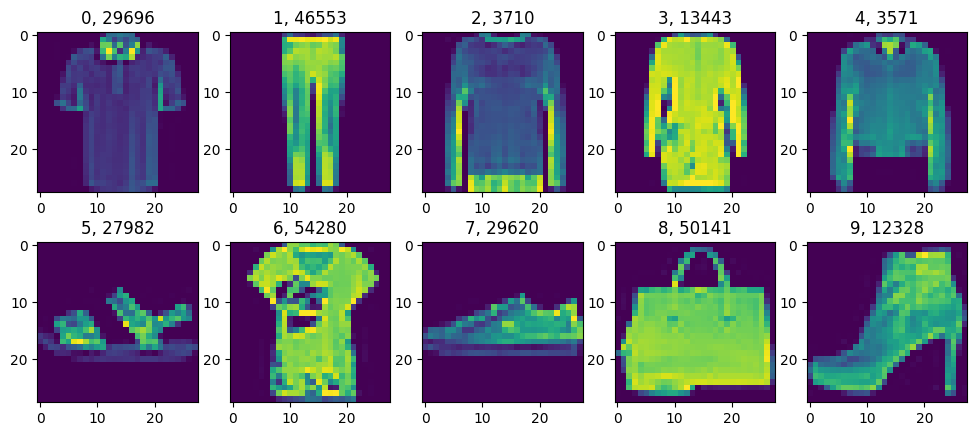

In [10]:
plt.figure(figsize=(12, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    idx = np.random.choice(np.where(y == i)[0])
    plt.title(f"{y[idx]}, {idx}")
    img_grid = np.reshape(X.values[idx], (28,28))
    plt.imshow(img_grid)

In [11]:
item_dictionary = {0: 't-shirt/top', 1: 'trouser',
                   2: 'pullover', 3: 'dress',
                   4: 'coat', 5: 'sandal',
                   6: 'shirt', 7: 'sneaker',
                   8: 'bag', 9: 'ankle_boot'}

y = y.map(item_dictionary)

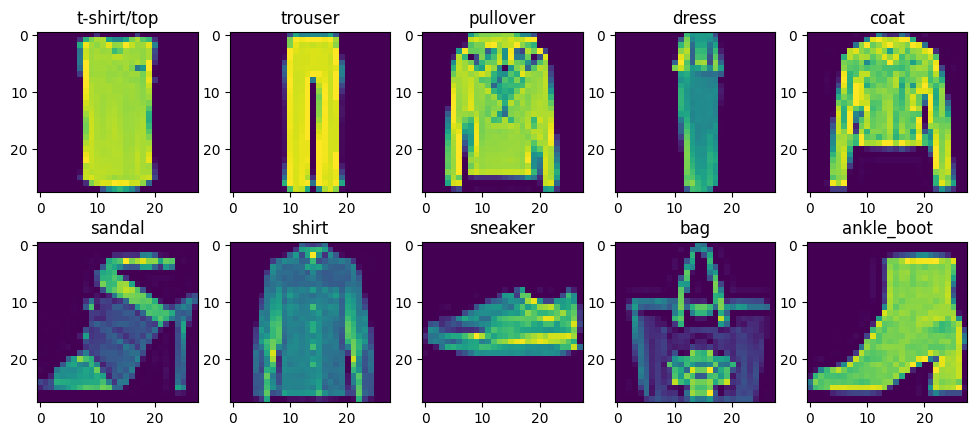

In [12]:
plt.figure(figsize=(12, 5))

for i in item_dictionary:
    plt.subplot(2, 5, i+1)
    idx = np.random.choice(np.where(y == item_dictionary[i])[0])
    plt.title(f"{y[idx]}")
    img_grid = np.reshape(X.values[idx], (28,28))
    plt.imshow(img_grid)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_low_dim = pca.fit_transform(X)

print(X_low_dim[:5])

[[  940.01497881  1264.93489861]
 [-1115.99075998   984.56996451]
 [ 1852.61374031   400.03294731]
 [  823.08592314  -592.94037585]
 [ 1057.32517787 -1029.96551339]]


In [14]:
df_low_dim = pd.DataFrame(X_low_dim, columns=['feature_1', 'feature_2'])

df_low_dim['y'] = y

df_low_dim.head()

,feature_1,feature_2,y
0,940.014979,1264.934899,pullover
1,-1115.990760,984.569965,ankle_boot
2,1852.613740,400.032947,shirt
3,823.085923,-592.940376,t-shirt/top
4,1057.325178,-1029.965513,dress


<Axes: xlabel='feature_1', ylabel='feature_2'>

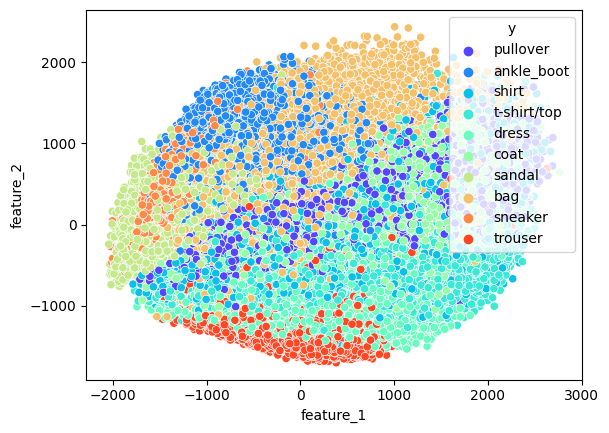

In [18]:
sns.scatterplot(data=df_low_dim, x="feature_1", y="feature_2", hue="y", palette="rainbow")

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

## **Building the Model**

- n_neighbors is the number of nearest neighbors to look at
- **n_neighbors is the hyperparameter** of KNN
- **p is a hyperparameter** of KNN for `metric=minkowski`
    - p = 1 refers to Manhattan Distance
    - p = 2 refers to Euclidean Distance
    - p > 3 is Minkowski Distance Metric


#### **Other Pairwise Distance Metrics Allowed**

| metric | Function |
| :---: | :---: |
| `'cityblock'` | metrics.pairwise.manhattan_distances |
| `'cosine'` | metrics.pairwise.cosine_distances |
| `'euclidean'` | metrics.pairwise.euclidean_distances |
| `'haversine'` | metrics.pairwise.haversine_distances |
| `'l1'` | metrics.pairwise.manhattan_distances |
| `'l2'` | metrics.pairwise.euclidean_distances |
| `'manhattan'` | metrics.pairwise.manhattan_distances |
| `'nan_euclidean'` | metrics.pairwise.nan_euclidean_distances |

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, n_jobs=-1)

classifier.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [ ]:
# Classes known to classifier
classifier.classes_

array(['ankle_boot', 'bag', 'coat', 'dress', 'pullover', 'sandal',
       'shirt', 'sneaker', 't-shirt/top', 'trouser'], dtype=object)

In [ ]:
# Knowing the distance metric used
classifier.effective_metric_

'euclidean'

In [ ]:
# Number of features seen by algo during training
classifier.n_features_in_

784

In [ ]:
# Names of features seen during training

classifier.feature_names_in_

array(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12',
       'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18',
       'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24',
       'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30',
       'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36',
       'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42',
       'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48',
       'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54',
       'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60',
       'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66',
       'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72',
       'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78',
       'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83'

## **Testing the Model Performance**

In [ ]:
%%time

# Prediction on unseen datapoints
y_test_pred = classifier.predict(X_test)

CPU times: user 1min 9s, sys: 28.7 s, total: 1min 38s
Wall time: 22 s


In [ ]:
# Calculate accuracy of class predictions
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.8546

## **Training KNN with `Manhattan` Distance Metric**

In [ ]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier = KNeighborsClassifier(metric='minkowski', p=1, n_jobs=-1)
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

print(f"Model's accuracy trained using KNN with {classifier.effective_metric_} distance metrics is {metrics.accuracy_score(y_test, y_test_pred)}.")

Model's accuracy trained using KNN with manhattan distance metrics is 0.8616666666666667.
CPU times: user 11min 32s, sys: 3.89 s, total: 11min 36s
Wall time: 1min 43s


## **Training KNN with `Minkowski` Distance Metric**

In [ ]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier = KNeighborsClassifier(metric='minkowski', p=3, n_jobs=-1)
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

print(f"Model's accuracy trained using KNN with {classifier.effective_metric_} distance metrics is {metrics.accuracy_score(y_test, y_test_pred)}.")

Model's accuracy trained using KNN with minkowski distance metrics is 0.8431333333333333.
CPU times: user 4h 5min 34s, sys: 7.64 s, total: 4h 5min 42s
Wall time: 32min 24s


## **Training KNN with `Cosine` Distance Metric**

In [ ]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier = KNeighborsClassifier(metric='cosine', n_jobs=-1)
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

print(f"Model's accuracy trained using KNN with {classifier.effective_metric_} distance metrics is {metrics.accuracy_score(y_test, y_test_pred)}.")

Model's accuracy trained using KNN with cosine distance metrics is 0.8567333333333333.
CPU times: user 1min 11s, sys: 30.5 s, total: 1min 42s
Wall time: 24.8 s


## **Other Performance Metrics**

In [ ]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

  ankle_boot       0.82      0.97      0.89      1477
         bag       0.96      0.97      0.97      1522
        coat       0.73      0.85      0.79      1476
       dress       0.92      0.88      0.90      1524
    pullover       0.78      0.81      0.80      1514
      sandal       1.00      0.74      0.85      1493
       shirt       0.73      0.58      0.65      1509
     sneaker       0.89      0.94      0.92      1485
 t-shirt/top       0.79      0.85      0.82      1487
     trouser       1.00      0.97      0.98      1513

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.85     15000
weighted avg       0.86      0.86      0.85     15000



In [ ]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[1439,    1,    0,    0,    0,    0,    0,   37,    0,    0],
       [   5, 1480,   15,    4,    6,    0,    8,    3,    1,    0],
       [   0,    2, 1255,   31,  123,    0,   57,    0,    7,    1],
       [   0,    1,   85, 1338,    7,    0,   32,    0,   58,    3],
       [   0,    2,  188,    7, 1230,    0,   75,    0,   12,    0],
       [ 240,   12,    0,    1,    0, 1106,    0,  133,    1,    0],
       [   0,   22,  162,   19,  179,    0,  870,    0,  255,    2],
       [  81,    1,    0,    0,    0,    3,    0, 1400,    0,    0],
       [   0,   16,   11,   24,   29,    0,  140,    1, 1266,    0],
       [   0,    2,    3,   28,    4,    0,    5,    0,    4, 1467]])

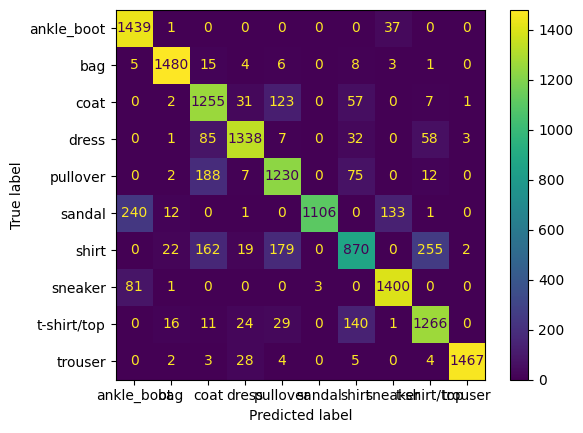

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)

fig = metrics.ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)

fig.plot()

In [ ]:
actual = np.sum(cm, axis=1).reshape(-1, 1)

cmn = np.round(cm/actual, 2)

print("Normalized Confusion Matrix:")
print(cmn)

Normalized Confusion Matrix:
[[0.97 0.   0.   0.   0.   0.   0.   0.03 0.   0.  ]
 [0.   0.97 0.01 0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   0.   0.85 0.02 0.08 0.   0.04 0.   0.   0.  ]
 [0.   0.   0.06 0.88 0.   0.   0.02 0.   0.04 0.  ]
 [0.   0.   0.12 0.   0.81 0.   0.05 0.   0.01 0.  ]
 [0.16 0.01 0.   0.   0.   0.74 0.   0.09 0.   0.  ]
 [0.   0.01 0.11 0.01 0.12 0.   0.58 0.   0.17 0.  ]
 [0.05 0.   0.   0.   0.   0.   0.   0.94 0.   0.  ]
 [0.   0.01 0.01 0.02 0.02 0.   0.09 0.   0.85 0.  ]
 [0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.97]]


Text(0.5, 23.38159722222222, 'Predicted')

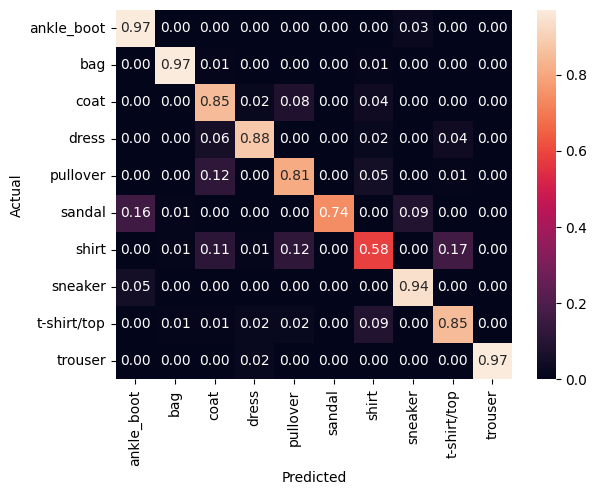

In [ ]:
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')